In [3]:
### fix how M values is taken in
### Switch to Jupyter Notebook
### Import Data
### Make a special data file with only 10 events or so
### Plot the raw signals from those 10 events
### Plot resulting Trapezoids
# figure out calibration
### Plot the full, calibrated energy spectra for Co, Cs, Am (to check for re-takes)
# Fit peaks and get FWHM Values
# Plot FWHM vs gap time
# Plot FWHM vs peak time
# Set optimal peak and gap times and save spectrum
# Make electronic noise plot
# calculate FANO factor
# Write text
# Write TEST functions
# baseline correction 99/ 799
# BASELINE CORREXTION #np.mean(data['Rawdata']) np apply along axis 0 =comuln, 1 = row
# REDO DATA Cs = low stats, Co maybe okay, Am/ Co peaks?/ pulser?

#BASELINE CORREXTION #np.mean(data['Rawdata']) np apply along axis 0 = comuln, 1 = row, reshape?
#def fast_baseline_correction(data):


In [145]:
%run lab1_analysis_functions.py

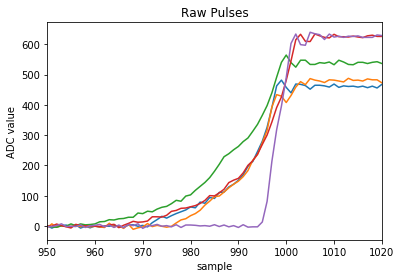

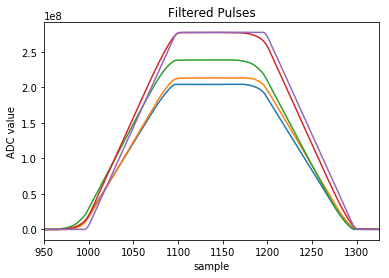

In [5]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
x_values = np.linspace(0, nsamples, nsamples)
tenevents = fast_baseline_correction(tenevents)
for event in tenevents[0:5]:
    plt.plot(event)
plt.xlim([950, 1020])
plt.title('Raw Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('tenevents_rawdata.pdf')
plt.show()

k = 100 
m = 100 
M = 4400

for event in tenevents[0:5]:
    event = fast_trapezoidal_filter(event, k, m, M=4400)
    plt.plot(x_values, event)
plt.xlim([950, 1325])
plt.title('Filtered Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('tenevents_filtered.pdf')
plt.show()

In [135]:
filename = 'data/Cs_pulser_real.h5'
raw_data = import_data(filename)

In [194]:
# OPTIMIZE GAP TIME

# k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(0, 100, 50) # steps in 100 ns from 1ns to 10us

number_of_events = len(raw_data)
ndata = 4096
number_of_events = 10000
assert number_of_events <= len(raw_data)

fwhm_values = []
m_values_ns = []

k = 100

baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
baseline_corrected_signals = raw_data[:number_of_events,] - baseline

M = find_M_value(baseline_corrected_signals[0:10])
print('M ', M)

for m in m_values:
    cs_nrgs=[]
    m = int(m)
    m_values_ns.append(m * 10)
    
    cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, baseline_corrected_signals , k, m, M)
        
    nbins = 2048
    cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048,range=[1e8,6.5e8]) #, range=Cs_range) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    fwhm, center = get_energy_resolution_cs_662(bins, cs_counts)
    fwhm_values.append(round(fwhm / center, 7) * 100)



('M ', 5930.7413273323618)


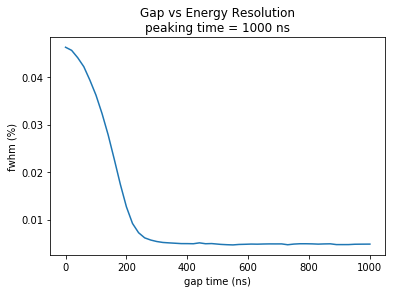

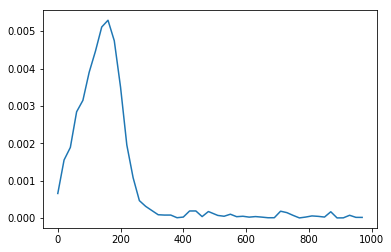

In [195]:
plt.plot(m_values_ns, fwhm_values, '-')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('gap_optimization.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

diff_list = abs(np.diff(fwhm_values))
plt.plot(m_values_ns[0:-1], diff_list, '-')
plt.show()

In [196]:
print(min(fwhm_values))
print(np.argmin(fwhm_values))
print(fwhm_values[np.argmin(fwhm_values)])
print(m_values_ns[np.argmin(fwhm_values)])

optimal_gap_time =  int(m_values_ns[np.argmin(fwhm_values)]) / 10
m = optimal_gap_time 
print(m)

0.0046636
27
0.0046636
550
55


In [231]:
%run lab1_analysis_functions.py

('M ', 5930.7413273323618)
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 400
    # variables        = 3
    chi-square         = 1860.720
    reduced chi-square = 4.687
    Akaike info crit   = 620.902
    Bayesian info crit = 632.876
[[Variables]]
    sigma:       1.5118e+05 +/- 3.81e+03 (2.52%) (init= 134388.7)
    center:      2.2649e+07 +/- 3.81e+03 (0.02%) (init= 2.264598e+07)
    amplitude:   1.4580e+07 +/- 3.18e+05 (2.18%) (init= 2.015831e+07)
    fwhm:        3.5599e+05 +/- 8.97e+03 (2.52%)  == '2.3548200*sigma'
    height:      38.4756035 +/- 0.839720 (2.18%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



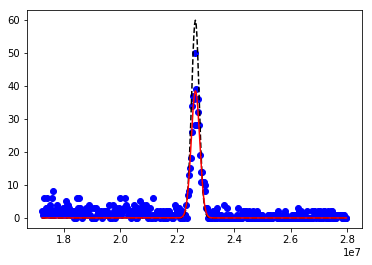

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 400
    # variables        = 3
    chi-square         = 2241.909
    reduced chi-square = 5.647
    Akaike info crit   = 695.447
    Bayesian info crit = 707.422
[[Variables]]
    sigma:       2.1890e+05 +/- 5.05e+03 (2.31%) (init= 203749)
    center:      4.5050e+07 +/- 5.05e+03 (0.01%) (init= 4.502404e+07)
    amplitude:   3.0985e+07 +/- 6.19e+05 (2.00%) (init= 3.667482e+07)
    fwhm:        5.1546e+05 +/- 1.19e+04 (2.31%)  == '2.3548200*sigma'
    height:      56.4712875 +/- 1.127340 (2.00%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



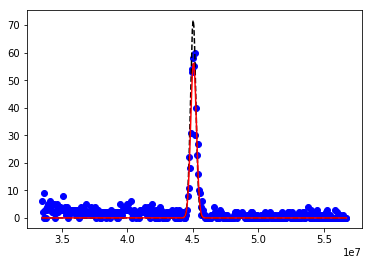

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2357.972
    reduced chi-square = 5.939
    Akaike info crit   = 715.637
    Bayesian info crit = 727.612
[[Variables]]
    sigma:       2.5918e+05 +/- 5.45e+03 (2.10%) (init= 223465.1)
    center:      6.7354e+07 +/- 5.45e+03 (0.01%) (init= 6.738584e+07)
    amplitude:   4.6938e+07 +/- 8.55e+05 (1.82%) (init= 5.497242e+07)
    fwhm:        6.1033e+05 +/- 1.28e+04 (2.10%)  == '2.3548200*sigma'
    height:      72.2487271 +/- 1.316595 (1.82%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



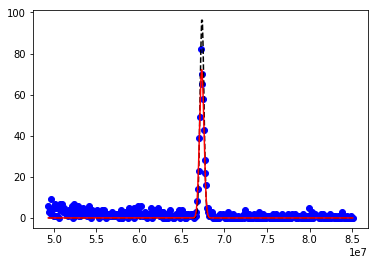

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2035.356
    reduced chi-square = 5.127
    Akaike info crit   = 656.785
    Bayesian info crit = 668.759
[[Variables]]
    sigma:       3.1026e+05 +/- 5.66e+03 (1.83%) (init= 361425.4)
    center:      8.9628e+07 +/- 5.66e+03 (0.01%) (init= 8.965414e+07)
    amplitude:   6.3872e+07 +/- 1.01e+06 (1.58%) (init= 8.67421e+07)
    fwhm:        7.3061e+05 +/- 1.33e+04 (1.83%)  == '2.3548200*sigma'
    height:      82.1282308 +/- 1.298038 (1.58%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



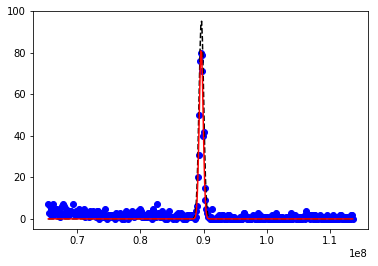

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2103.449
    reduced chi-square = 5.298
    Akaike info crit   = 669.948
    Bayesian info crit = 681.922
[[Variables]]
    sigma:       3.4314e+05 +/- 5.99e+03 (1.75%) (init= 303040.2)
    center:      1.1186e+08 +/- 5.99e+03 (0.01%) (init= 1.118973e+08)
    amplitude:   8.0004e+07 +/- 1.21e+06 (1.51%) (init= 9.091206e+07)
    fwhm:        8.0803e+05 +/- 1.41e+04 (1.75%)  == '2.3548200*sigma'
    height:      93.0143229 +/- 1.407131 (1.51%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



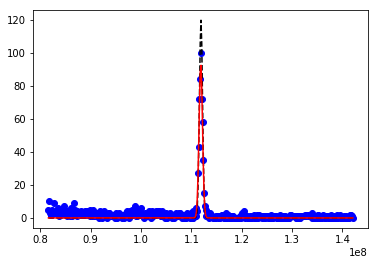

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2042.051
    reduced chi-square = 5.144
    Akaike info crit   = 658.098
    Bayesian info crit = 670.073
[[Variables]]
    sigma:       3.7837e+05 +/- 6.19e+03 (1.64%) (init= 365052.5)
    center:      1.3407e+08 +/- 6.19e+03 (0.00%) (init= 1.340266e+08)
    amplitude:   9.7031e+07 +/- 1.37e+06 (1.42%) (init= 1.084206e+08)
    fwhm:        8.9100e+05 +/- 1.46e+04 (1.64%)  == '2.3548200*sigma'
    height:      102.306411 +/- 1.449123 (1.42%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



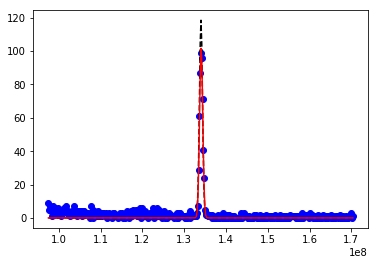

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2231.176
    reduced chi-square = 5.620
    Akaike info crit   = 693.528
    Bayesian info crit = 705.502
[[Variables]]
    sigma:       3.9247e+05 +/- 6.40e+03 (1.63%) (init= 320255.3)
    center:      1.5627e+08 +/- 6.40e+03 (0.00%) (init= 1.562499e+08)
    amplitude:   1.1202e+08 +/- 1.58e+06 (1.41%) (init= 1.085665e+08)
    fwhm:        9.2419e+05 +/- 1.51e+04 (1.63%)  == '2.3548200*sigma'
    height:      113.863422 +/- 1.608517 (1.41%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



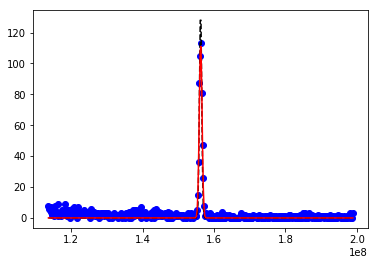

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2190.441
    reduced chi-square = 5.517
    Akaike info crit   = 686.157
    Bayesian info crit = 698.132
[[Variables]]
    sigma:       4.1311e+05 +/- 6.37e+03 (1.54%) (init= 366715.7)
    center:      1.7847e+08 +/- 6.37e+03 (0.00%) (init= 1.784447e+08)
    amplitude:   1.2890e+08 +/- 1.72e+06 (1.34%) (init= 1.298174e+08)
    fwhm:        9.7281e+05 +/- 1.50e+04 (1.54%)  == '2.3548200*sigma'
    height:      124.476439 +/- 1.662294 (1.34%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



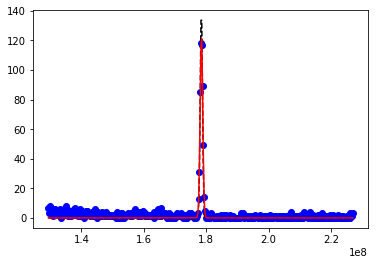

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2250.823
    reduced chi-square = 5.670
    Akaike info crit   = 697.035
    Bayesian info crit = 709.009
[[Variables]]
    sigma:       4.3597e+05 +/- 6.60e+03 (1.51%) (init= 278552.2)
    center:      2.0288e+08 +/- 6.60e+03 (0.00%) (init= 2.028974e+08)
    amplitude:   1.4584e+08 +/- 1.91e+06 (1.31%) (init= 1.077997e+08)
    fwhm:        1.0266e+06 +/- 1.56e+04 (1.51%)  == '2.3548200*sigma'
    height:      133.448358 +/- 1.750846 (1.31%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



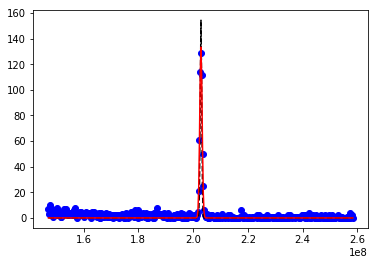

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2263.013
    reduced chi-square = 5.700
    Akaike info crit   = 699.195
    Bayesian info crit = 711.170
[[Variables]]
    sigma:       4.5492e+05 +/- 6.74e+03 (1.48%) (init= 309524.4)
    center:      2.2507e+08 +/- 6.74e+03 (0.00%) (init= 2.249647e+08)
    amplitude:   1.6105e+08 +/- 2.07e+06 (1.28%) (init= 1.290717e+08)
    fwhm:        1.0713e+06 +/- 1.59e+04 (1.48%)  == '2.3548200*sigma'
    height:      141.229659 +/- 1.811639 (1.28%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



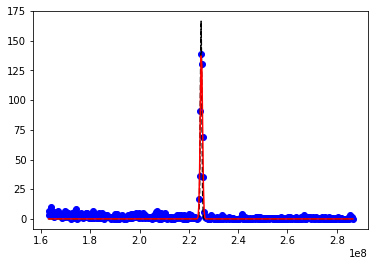

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2217.469
    reduced chi-square = 5.586
    Akaike info crit   = 691.063
    Bayesian info crit = 703.037
[[Variables]]
    sigma:       4.7538e+05 +/- 6.77e+03 (1.42%) (init= 340487.9)
    center:      2.4723e+08 +/- 6.77e+03 (0.00%) (init= 2.471499e+08)
    amplitude:   1.7784e+08 +/- 2.19e+06 (1.23%) (init= 1.532196e+08)
    fwhm:        1.1194e+06 +/- 1.59e+04 (1.42%)  == '2.3548200*sigma'
    height:      149.244145 +/- 1.839995 (1.23%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



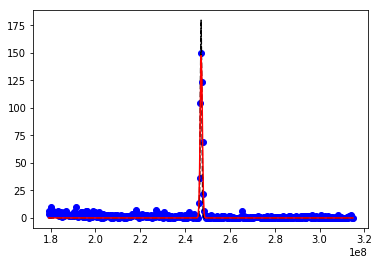

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2285.621
    reduced chi-square = 5.757
    Akaike info crit   = 703.171
    Bayesian info crit = 715.146
[[Variables]]
    sigma:       5.0469e+05 +/- 7.19e+03 (1.42%) (init= 371441.4)
    center:      2.6941e+08 +/- 7.19e+03 (0.00%) (init= 2.694518e+08)
    amplitude:   1.9428e+08 +/- 2.40e+06 (1.23%) (init= 1.626913e+08)
    fwhm:        1.1885e+06 +/- 1.69e+04 (1.42%)  == '2.3548200*sigma'
    height:      153.576595 +/- 1.893574 (1.23%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



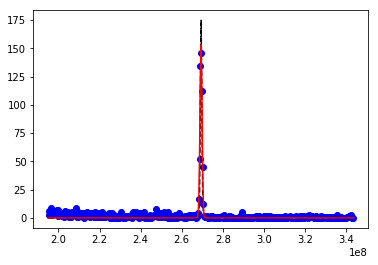

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2233.073
    reduced chi-square = 5.625
    Akaike info crit   = 693.868
    Bayesian info crit = 705.842
[[Variables]]
    sigma:       5.3664e+05 +/- 7.43e+03 (1.38%) (init= 402394.2)
    center:      2.9160e+08 +/- 7.43e+03 (0.00%) (init= 2.914747e+08)
    amplitude:   2.1196e+08 +/- 2.54e+06 (1.20%) (init= 1.798702e+08)
    fwhm:        1.2637e+06 +/- 1.75e+04 (1.38%)  == '2.3548200*sigma'
    height:      157.570704 +/- 1.889328 (1.20%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



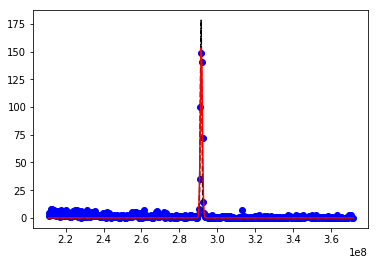

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2255.782
    reduced chi-square = 5.682
    Akaike info crit   = 697.915
    Bayesian info crit = 709.889
[[Variables]]
    sigma:       5.5397e+05 +/- 7.55e+03 (1.36%) (init= 650025.1)
    center:      3.1375e+08 +/- 7.55e+03 (0.00%) (init= 3.137784e+08)
    amplitude:   2.2818e+08 +/- 2.69e+06 (1.18%) (init= 2.964115e+08)
    fwhm:        1.3045e+06 +/- 1.78e+04 (1.36%)  == '2.3548200*sigma'
    height:      164.323009 +/- 1.939624 (1.18%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



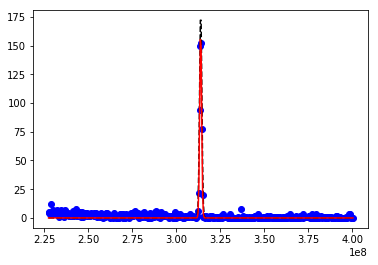

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 400
    # variables        = 3
    chi-square         = 2545.767
    reduced chi-square = 6.413
    Akaike info crit   = 746.289
    Bayesian info crit = 758.263
[[Variables]]
    sigma:       5.9451e+05 +/- 8.52e+03 (1.43%) (init= 696455.9)
    center:      3.3592e+08 +/- 8.52e+03 (0.00%) (init= 3.359413e+08)
    amplitude:   2.4711e+08 +/- 3.07e+06 (1.24%) (init= 3.175839e+08)
    fwhm:        1.4000e+06 +/- 2.01e+04 (1.43%)  == '2.3548200*sigma'
    height:      165.822776 +/- 2.058622 (1.24%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



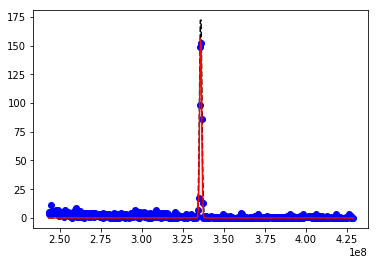

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2866.715
    reduced chi-square = 7.221
    Akaike info crit   = 793.783
    Bayesian info crit = 805.757
[[Variables]]
    sigma:       5.9379e+05 +/- 8.80e+03 (1.48%) (init= 495248.7)
    center:      3.5808e+08 +/- 8.80e+03 (0.00%) (init= 3.579122e+08)
    amplitude:   2.6182e+08 +/- 3.36e+06 (1.28%) (init= 2.466339e+08)
    fwhm:        1.3983e+06 +/- 2.07e+04 (1.48%)  == '2.3548200*sigma'
    height:      175.904766 +/- 2.257718 (1.28%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



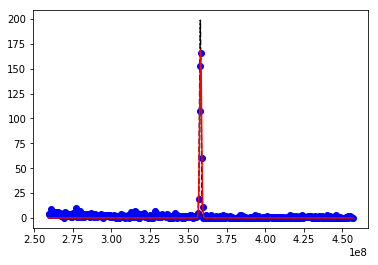

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2710.476
    reduced chi-square = 6.827
    Akaike info crit   = 771.366
    Bayesian info crit = 783.340
[[Variables]]
    sigma:       6.2707e+05 +/- 8.94e+03 (1.43%) (init= 529284.6)
    center:      3.8244e+08 +/- 8.95e+03 (0.00%) (init= 3.823517e+08)
    amplitude:   2.8092e+08 +/- 3.47e+06 (1.24%) (init= 2.60408e+08)
    fwhm:        1.4766e+06 +/- 2.11e+04 (1.43%)  == '2.3548200*sigma'
    height:      178.721386 +/- 2.208075 (1.24%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



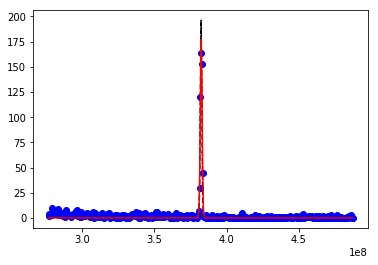

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2198.072
    reduced chi-square = 5.537
    Akaike info crit   = 687.549
    Bayesian info crit = 699.523
[[Variables]]
    sigma:       6.1389e+05 +/- 7.74e+03 (1.26%) (init= 560226.7)
    center:      4.0458e+08 +/- 7.75e+03 (0.00%) (init= 4.046797e+08)
    amplitude:   2.9113e+08 +/- 3.18e+06 (1.09%) (init= 3.176485e+08)
    fwhm:        1.4456e+06 +/- 1.82e+04 (1.26%)  == '2.3548200*sigma'
    height:      189.193619 +/- 2.067171 (1.09%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



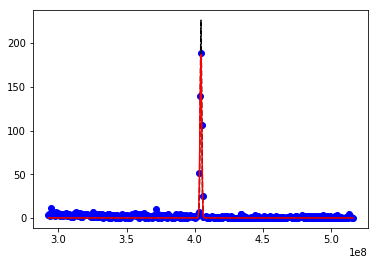

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2954.878
    reduced chi-square = 7.443
    Akaike info crit   = 805.899
    Bayesian info crit = 817.874
[[Variables]]
    sigma:       6.5230e+05 +/- 9.45e+03 (1.45%) (init= 591173.8)
    center:      4.2675e+08 +/- 9.43e+03 (0.00%) (init= 4.264819e+08)
    amplitude:   3.1191e+08 +/- 3.91e+06 (1.25%) (init= 3.263279e+08)
    fwhm:        1.5361e+06 +/- 2.22e+04 (1.45%)  == '2.3548200*sigma'
    height:      190.762628 +/- 2.390565 (1.25%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.578 



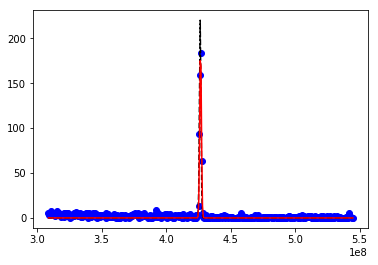

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2444.727
    reduced chi-square = 6.158
    Akaike info crit   = 730.090
    Bayesian info crit = 742.064
[[Variables]]
    sigma:       6.9018e+05 +/- 9.11e+03 (1.32%) (init= 622115.9)
    center:      4.4891e+08 +/- 9.12e+03 (0.00%) (init= 4.489027e+08)
    amplitude:   3.2771e+08 +/- 3.75e+06 (1.14%) (init= 3.415416e+08)
    fwhm:        1.6252e+06 +/- 2.14e+04 (1.32%)  == '2.3548200*sigma'
    height:      189.428853 +/- 2.166171 (1.14%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



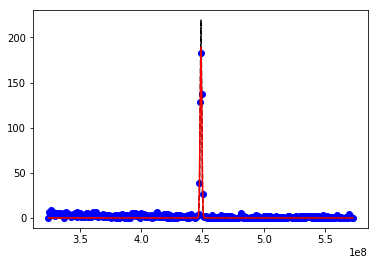

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 75
    # data points      = 400
    # variables        = 3
    chi-square         = 2484.787
    reduced chi-square = 6.259
    Akaike info crit   = 736.591
    Bayesian info crit = 748.565
[[Variables]]
    sigma:       6.9385e+05 +/- 9.14e+03 (1.32%) (init= 4.342784e+07)
    center:      4.7103e+08 +/- 9.11e+03 (0.00%) (init= 4.713799e+08)
    amplitude:   3.4152e+08 +/- 3.89e+06 (1.14%) (init= 2.37116e+10)
    fwhm:        1.6339e+06 +/- 2.15e+04 (1.32%)  == '2.3548200*sigma'
    height:      196.364786 +/- 2.235580 (1.14%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.578 



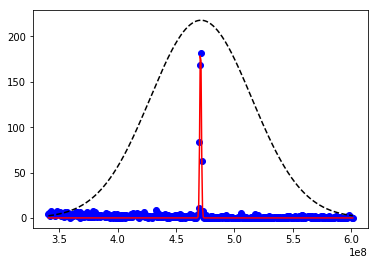

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2204.133
    reduced chi-square = 5.552
    Akaike info crit   = 688.650
    Bayesian info crit = 700.624
[[Variables]]
    sigma:       7.1752e+05 +/- 8.80e+03 (1.23%) (init= 683987.4)
    center:      4.9315e+08 +/- 8.83e+03 (0.00%) (init= 4.932371e+08)
    amplitude:   3.5729e+08 +/- 3.80e+06 (1.06%) (init= 3.980807e+08)
    fwhm:        1.6896e+06 +/- 2.07e+04 (1.23%)  == '2.3548200*sigma'
    height:      198.653638 +/- 2.114001 (1.06%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



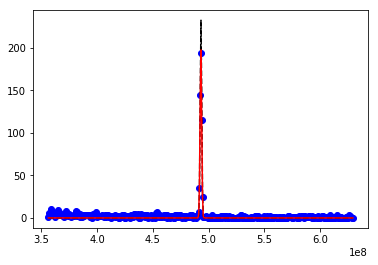

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 79
    # data points      = 400
    # variables        = 3
    chi-square         = 2443.229
    reduced chi-square = 6.154
    Akaike info crit   = 729.844
    Bayesian info crit = 741.819
[[Variables]]
    sigma:       7.2196e+05 +/- 9.20e+03 (1.27%) (init= 4.75423e+07)
    center:      5.1531e+08 +/- 9.17e+03 (0.00%) (init= 5.150923e+08)
    amplitude:   3.7334e+08 +/- 4.11e+06 (1.10%) (init= 2.709911e+10)
    fwhm:        1.7001e+06 +/- 2.17e+04 (1.27%)  == '2.3548200*sigma'
    height:      206.303665 +/- 2.273423 (1.10%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.578 



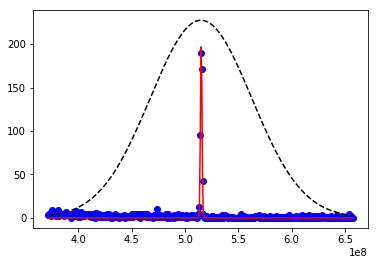

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 75
    # data points      = 400
    # variables        = 3
    chi-square         = 2196.431
    reduced chi-square = 5.533
    Akaike info crit   = 687.250
    Bayesian info crit = 699.224
[[Variables]]
    sigma:       7.2617e+05 +/- 8.71e+03 (1.20%) (init= 4.959943e+07)
    center:      5.3746e+08 +/- 8.67e+03 (0.00%) (init= 5.376932e+08)
    amplitude:   3.8602e+08 +/- 4.00e+06 (1.04%) (init= 3.020605e+10)
    fwhm:        1.7100e+06 +/- 2.05e+04 (1.20%)  == '2.3548200*sigma'
    height:      212.074107 +/- 2.197343 (1.04%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.579 



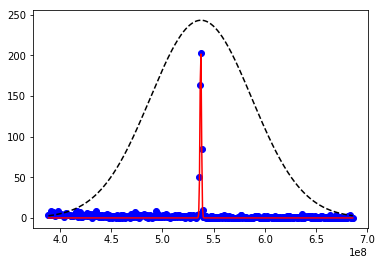

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2332.133
    reduced chi-square = 5.874
    Akaike info crit   = 711.230
    Bayesian info crit = 723.204
[[Variables]]
    sigma:       7.1572e+05 +/- 8.49e+03 (1.19%) (init= 779883.5)
    center:      5.6177e+08 +/- 8.74e+03 (0.00%) (init= 5.617676e+08)
    amplitude:   3.9650e+08 +/- 4.15e+06 (1.05%) (init= 5.240817e+08)
    fwhm:        1.6854e+06 +/- 2.00e+04 (1.19%)  == '2.3548200*sigma'
    height:      221.010930 +/- 2.301822 (1.04%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.571 



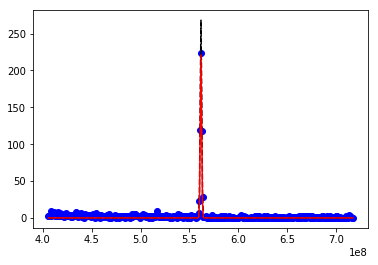

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 75
    # data points      = 400
    # variables        = 3
    chi-square         = 2248.074
    reduced chi-square = 5.663
    Akaike info crit   = 696.546
    Bayesian info crit = 708.520
[[Variables]]
    sigma:       7.5931e+05 +/- 9.16e+03 (1.21%) (init= 5.391917e+07)
    center:      5.8393e+08 +/- 9.05e+03 (0.00%) (init= 5.836513e+08)
    amplitude:   4.1644e+08 +/- 4.32e+06 (1.04%) (init= 3.299853e+10)
    fwhm:        1.7880e+06 +/- 2.16e+04 (1.21%)  == '2.3548200*sigma'
    height:      218.797373 +/- 2.273032 (1.04%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.580 



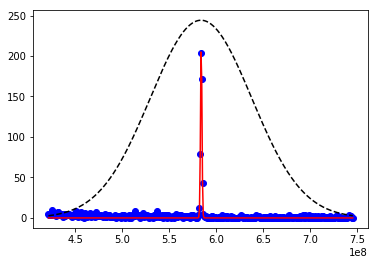

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 70
    # data points      = 400
    # variables        = 3
    chi-square         = 2357.757
    reduced chi-square = 5.939
    Akaike info crit   = 715.601
    Bayesian info crit = 727.575
[[Variables]]
    sigma:       7.3745e+05 +/- 9.02e+03 (1.22%) (init= 5.597589e+07)
    center:      6.0610e+08 +/- 8.82e+03 (0.00%) (init= 6.063747e+08)
    amplitude:   4.2656e+08 +/- 4.45e+06 (1.04%) (init= 3.694409e+10)
    fwhm:        1.7366e+06 +/- 2.12e+04 (1.22%)  == '2.3548200*sigma'
    height:      230.756861 +/- 2.417687 (1.05%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.582 



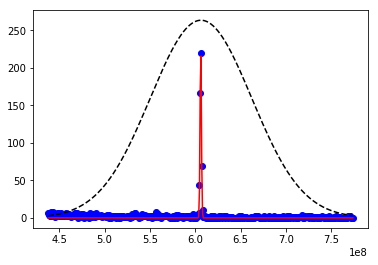

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 69
    # data points      = 400
    # variables        = 3
    chi-square         = 2221.599
    reduced chi-square = 5.596
    Akaike info crit   = 691.807
    Bayesian info crit = 703.782
[[Variables]]
    sigma:       7.7043e+05 +/- 8.64e+03 (1.12%) (init= 5.803268e+07)
    center:      6.2822e+08 +/- 9.00e+03 (0.00%) (init= 6.282881e+08)
    amplitude:   4.4476e+08 +/- 4.44e+06 (1.00%) (init= 4.021665e+10)
    fwhm:        1.8142e+06 +/- 2.03e+04 (1.12%)  == '2.3548200*sigma'
    height:      230.304363 +/- 2.280199 (0.99%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.569 



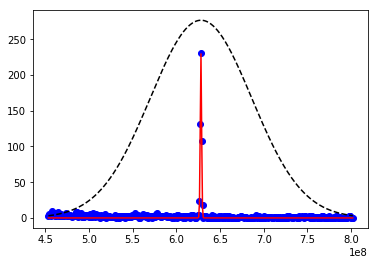

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 400
    # variables        = 3
    chi-square         = 2356.069
    reduced chi-square = 5.935
    Akaike info crit   = 715.314
    Bayesian info crit = 727.288
[[Variables]]
    sigma:       8.5699e+05 +/- 1.03e+04 (1.20%) (init= 903602)
    center:      6.5033e+08 +/- 1.04e+04 (0.00%) (init= 6.50202e+08)
    amplitude:   4.7111e+08 +/- 4.93e+06 (1.05%) (init= 5.774017e+08)
    fwhm:        2.0181e+06 +/- 2.42e+04 (1.20%)  == '2.3548200*sigma'
    height:      219.309121 +/- 2.290241 (1.04%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.574 



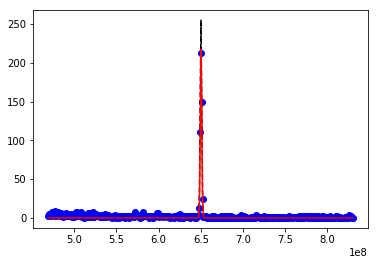

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 69
    # data points      = 400
    # variables        = 3
    chi-square         = 2311.115
    reduced chi-square = 5.821
    Akaike info crit   = 707.608
    Bayesian info crit = 719.583
[[Variables]]
    sigma:       8.7067e+05 +/- 1.06e+04 (1.22%) (init= 6.21462e+07)
    center:      6.7247e+08 +/- 1.04e+04 (0.00%) (init= 6.72114e+08)
    amplitude:   4.8280e+08 +/- 5.04e+06 (1.04%) (init= 3.747416e+10)
    fwhm:        2.0503e+06 +/- 2.50e+04 (1.22%)  == '2.3548200*sigma'
    height:      221.217716 +/- 2.316641 (1.05%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.582 



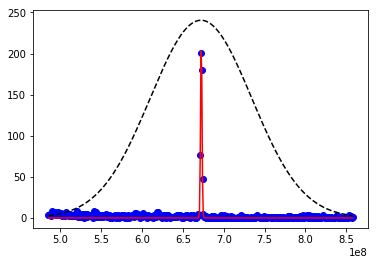

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 77
    # data points      = 400
    # variables        = 3
    chi-square         = 2276.903
    reduced chi-square = 5.735
    Akaike info crit   = 701.643
    Bayesian info crit = 713.617
[[Variables]]
    sigma:       8.6359e+05 +/- 1.04e+04 (1.20%) (init= 6.420276e+07)
    center:      6.9464e+08 +/- 1.01e+04 (0.00%) (init= 6.949904e+08)
    amplitude:   4.9562e+08 +/- 5.07e+06 (1.02%) (init= 4.121817e+10)
    fwhm:        2.0336e+06 +/- 2.45e+04 (1.20%)  == '2.3548200*sigma'
    height:      228.954552 +/- 2.355427 (1.03%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.584 



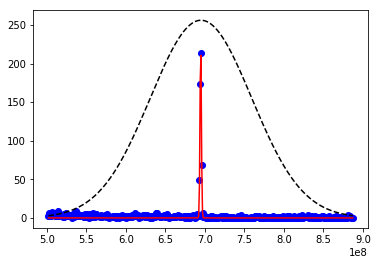

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 77
    # data points      = 400
    # variables        = 3
    chi-square         = 2232.368
    reduced chi-square = 5.623
    Akaike info crit   = 693.741
    Bayesian info crit = 705.716
[[Variables]]
    sigma:       8.5536e+05 +/- 9.58e+03 (1.12%) (init= 6.625905e+07)
    center:      7.1676e+08 +/- 9.89e+03 (0.00%) (init= 7.169292e+08)
    amplitude:   5.0715e+08 +/- 5.02e+06 (0.99%) (init= 4.651385e+10)
    fwhm:        2.0142e+06 +/- 2.26e+04 (1.12%)  == '2.3548200*sigma'
    height:      236.537675 +/- 2.326798 (0.98%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.571 



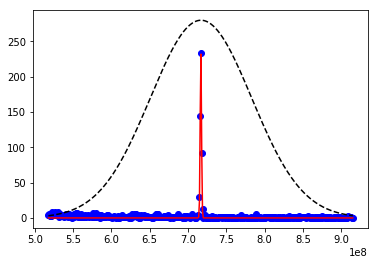

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 2303.742
    reduced chi-square = 5.803
    Akaike info crit   = 706.330
    Bayesian info crit = 718.305
[[Variables]]
    sigma:       9.0815e+05 +/- 1.02e+04 (1.12%) (init= 1030394)
    center:      7.4110e+08 +/- 1.07e+04 (0.00%) (init= 7.410642e+08)
    amplitude:   5.3196e+08 +/- 5.33e+06 (1.00%) (init= 7.202451e+08)
    fwhm:        2.1385e+06 +/- 2.40e+04 (1.12%)  == '2.3548200*sigma'
    height:      233.684477 +/- 2.319923 (0.99%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.568 



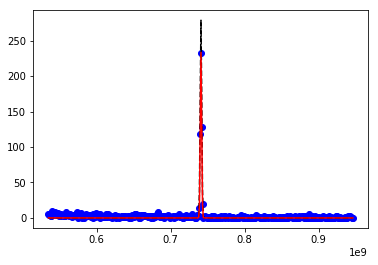

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 400
    # variables        = 3
    chi-square         = 2284.768
    reduced chi-square = 5.755
    Akaike info crit   = 703.022
    Bayesian info crit = 714.996
[[Variables]]
    sigma:       9.8076e+05 +/- 1.15e+04 (1.17%) (init= 7.057757e+07)
    center:      7.6321e+08 +/- 1.16e+04 (0.00%) (init= 7.630043e+08)
    amplitude:   5.5224e+08 +/- 5.63e+06 (1.02%) (init= 4.5946e+10)
    fwhm:        2.3095e+06 +/- 2.71e+04 (1.17%)  == '2.3548200*sigma'
    height:      224.634743 +/- 2.288174 (1.02%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.575 



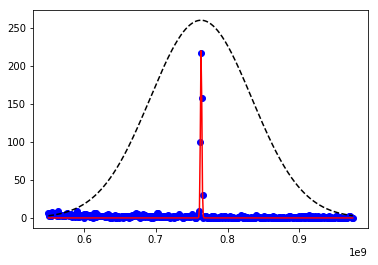

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 70
    # data points      = 400
    # variables        = 3
    chi-square         = 2256.476
    reduced chi-square = 5.684
    Akaike info crit   = 698.038
    Bayesian info crit = 710.012
[[Variables]]
    sigma:       9.6742e+05 +/- 1.15e+04 (1.19%) (init= 7.263402e+07)
    center:      7.8536e+08 +/- 1.11e+04 (0.00%) (init= 7.849449e+08)
    amplitude:   5.6477e+08 +/- 5.69e+06 (1.01%) (init= 4.575943e+10)
    fwhm:        2.2781e+06 +/- 2.71e+04 (1.19%)  == '2.3548200*sigma'
    height:      232.900183 +/- 2.362362 (1.01%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.585 



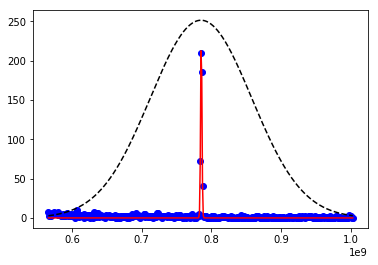

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 77
    # data points      = 400
    # variables        = 3
    chi-square         = 2403.323
    reduced chi-square = 6.054
    Akaike info crit   = 723.257
    Bayesian info crit = 735.232
[[Variables]]
    sigma:       9.5710e+05 +/- 1.20e+04 (1.26%) (init= 7.469065e+07)
    center:      8.0752e+08 +/- 1.12e+04 (0.00%) (init= 8.080106e+08)
    amplitude:   5.7277e+08 +/- 5.96e+06 (1.04%) (init= 4.79514e+10)
    fwhm:        2.2538e+06 +/- 2.83e+04 (1.26%)  == '2.3548200*sigma'
    height:      238.744404 +/- 2.520847 (1.06%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.591 



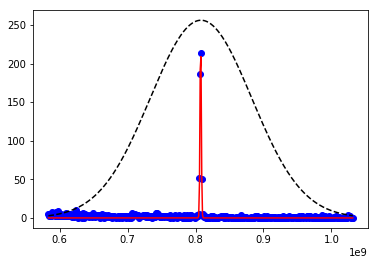

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 400
    # variables        = 3
    chi-square         = 2471.880
    reduced chi-square = 6.226
    Akaike info crit   = 734.508
    Bayesian info crit = 746.482
[[Variables]]
    sigma:       9.8661e+05 +/- 1.22e+04 (1.23%) (init= 7.674706e+07)
    center:      8.2964e+08 +/- 1.19e+04 (0.00%) (init= 8.299817e+08)
    amplitude:   5.8534e+08 +/- 6.16e+06 (1.05%) (init= 5.249499e+10)
    fwhm:        2.3233e+06 +/- 2.86e+04 (1.23%)  == '2.3548200*sigma'
    height:      236.686020 +/- 2.502411 (1.06%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.581 



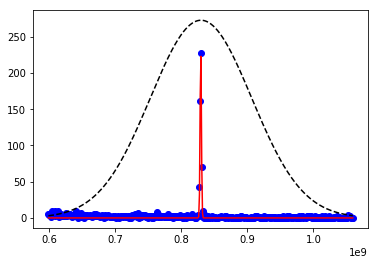

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 400
    # variables        = 3
    chi-square         = 2370.428
    reduced chi-square = 5.971
    Akaike info crit   = 717.744
    Bayesian info crit = 729.719
[[Variables]]
    sigma:       1.0055e+06 +/- 1.17e+04 (1.16%) (init= 7.88033e+07)
    center:      8.5172e+08 +/- 1.19e+04 (0.00%) (init= 8.519511e+08)
    amplitude:   6.0067e+08 +/- 6.13e+06 (1.02%) (init= 5.531992e+10)
    fwhm:        2.3677e+06 +/- 2.75e+04 (1.16%)  == '2.3548200*sigma'
    height:      238.328552 +/- 2.419943 (1.02%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.573 



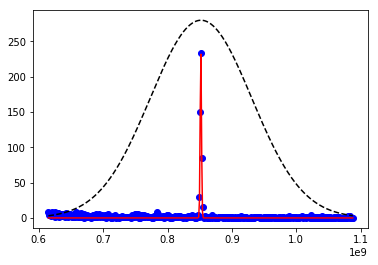

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 400
    # variables        = 3
    chi-square         = 2281.733
    reduced chi-square = 5.747
    Akaike info crit   = 702.490
    Bayesian info crit = 714.465
[[Variables]]
    sigma:       1.0413e+06 +/- 1.15e+04 (1.10%) (init= 8.085952e+07)
    center:      8.7384e+08 +/- 1.21e+04 (0.00%) (init= 8.739201e+08)
    amplitude:   6.2204e+08 +/- 6.16e+06 (0.99%) (init= 5.77337e+10)
    fwhm:        2.4522e+06 +/- 2.70e+04 (1.10%)  == '2.3548200*sigma'
    height:      238.302751 +/- 2.332000 (0.98%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.566 



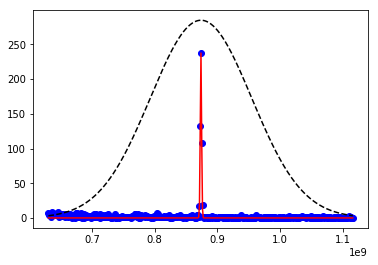

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 75
    # data points      = 400
    # variables        = 3
    chi-square         = 2306.679
    reduced chi-square = 5.810
    Akaike info crit   = 706.840
    Bayesian info crit = 718.814
[[Variables]]
    sigma:       1.1117e+06 +/- 1.26e+04 (1.14%) (init= 8.312155e+07)
    center:      8.9820e+08 +/- 1.31e+04 (0.00%) (init= 8.980882e+08)
    amplitude:   6.4640e+08 +/- 6.51e+06 (1.01%) (init= 5.735387e+10)
    fwhm:        2.6178e+06 +/- 2.97e+04 (1.14%)  == '2.3548200*sigma'
    height:      231.968184 +/- 2.319482 (1.00%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.570 



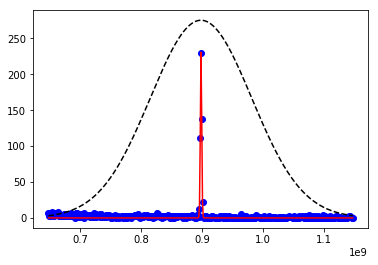

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 79
    # data points      = 400
    # variables        = 3
    chi-square         = 2288.205
    reduced chi-square = 5.764
    Akaike info crit   = 703.623
    Bayesian info crit = 715.598
[[Variables]]
    sigma:       1.0891e+06 +/- 1.23e+04 (1.13%) (init= 8.517792e+07)
    center:      9.2030e+08 +/- 1.26e+04 (0.00%) (init= 9.200589e+08)
    amplitude:   6.5636e+08 +/- 6.51e+06 (0.99%) (init= 6.005044e+10)
    fwhm:        2.5646e+06 +/- 2.89e+04 (1.13%)  == '2.3548200*sigma'
    height:      240.427607 +/- 2.371680 (0.99%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.573 



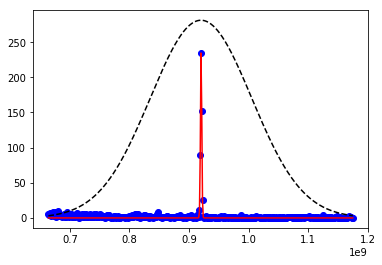

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 79
    # data points      = 400
    # variables        = 3
    chi-square         = 2457.601
    reduced chi-square = 6.190
    Akaike info crit   = 732.191
    Bayesian info crit = 744.165
[[Variables]]
    sigma:       1.1642e+06 +/- 1.44e+04 (1.24%) (init= 8.723421e+07)
    center:      9.4250e+08 +/- 1.40e+04 (0.00%) (init= 9.420286e+08)
    amplitude:   6.7782e+08 +/- 7.13e+06 (1.05%) (init= 5.469585e+10)
    fwhm:        2.7415e+06 +/- 3.39e+04 (1.24%)  == '2.3548200*sigma'
    height:      232.273349 +/- 2.457575 (1.06%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.584 



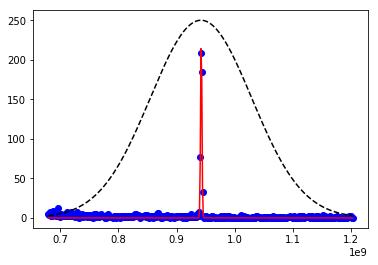

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 71
    # data points      = 400
    # variables        = 3
    chi-square         = 2368.174
    reduced chi-square = 5.965
    Akaike info crit   = 717.364
    Bayesian info crit = 729.338
[[Variables]]
    sigma:       1.1100e+06 +/- 1.39e+04 (1.25%) (init= 8.92906e+07)
    center:      9.6458e+08 +/- 1.27e+04 (0.00%) (init= 9.639995e+08)
    amplitude:   6.8373e+08 +/- 6.99e+06 (1.02%) (init= 5.652095e+10)
    fwhm:        2.6138e+06 +/- 3.28e+04 (1.25%)  == '2.3548200*sigma'
    height:      245.743274 +/- 2.567657 (1.04%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.595 



In [ ]:
# OPTIMIZE PEAKING TIME

k_values = np.linspace(10, 800, 79) # steps in 100 ns from 1ns to 10us
# m_values = np.linspace(0, 100, 50) # steps in 100 ns from 1ns to 10us

Cs_range = [1e8,6.5e8]

number_of_events = len(raw_data)
ndata = 4096
number_of_events = 10000
assert number_of_events <= len(raw_data)

fwhm_values = []
k_values_ns = []

baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
baseline_corrected_signals = raw_data[:number_of_events,] - baseline

M = find_M_value(baseline_corrected_signals[0:10])
print('M ', M)

for k in k_values:
    cs_nrgs=[]
    k = int(k)
    #print(k)
    k_values_ns.append(k * 10)
    
    cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, baseline_corrected_signals, k, m, M)
        
    nbins = 2048
    cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048,range=[1e7, max(cs_nrgs)/25]) #, range=Cs_range) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    #plt.plot(bins, cs_counts)
    #plt.show()
    #plt.plot(bins[0:2048/2], cs_counts[0:2048/2]) 
    #plt.show()
    fwhm, center = get_energy_resolution_cs_662(bins, cs_counts)
    fwhm_values.append(round(fwhm / center, 7) * 100)



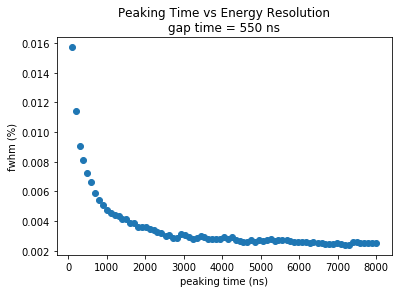

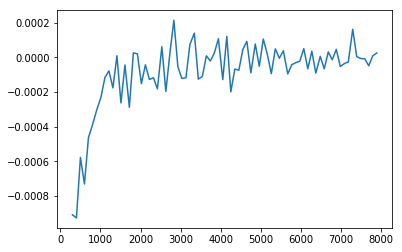

In [198]:
plt.plot(k_values_ns, fwhm_values, 'o')
plt.xlabel('peaking time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('peak_optimization.png')
plt.title('Peaking Time vs Energy Resolution' + '\n'  + 'gap time = 550 ns')
plt.show()

diff_list = (np.diff(fwhm_values))
plt.plot(k_values_ns[2:-1], diff_list[2:], '-')
plt.show()

In [201]:
print(min(fwhm_values))
print(np.argmin(fwhm_values))
print(fwhm_values[np.argmin(fwhm_values)])
print(k_values_ns[np.argmin(fwhm_values)])

optimal_peaking_time = int(k_values_ns[np.argmin(fwhm_values)] / 10)
k = optimal_peaking_time
print(k)

0.0023972
71
0.0023972
7290
729


In [202]:
# Resolution Vs. Energy
print(' m = ', m * 10, ' ns')
print(' k = ', k * 10, ' ns')
print(' M = ', M / 10, ' ns')

(' m = ', 550, ' ns')
(' k = ', 7290, ' ns')
(' M = ', 593.07413273323618, ' ns')


In [205]:
filename = 'data/Am_pulser_real.h5'
am_raw_data = import_data(filename)

filename = 'data/Cs_pulser_real.h5'
cs_raw_data = import_data(filename)

filename = 'data/Co_pulser_real.h5'
co_raw_data = import_data(filename)

In [251]:
# GET ENERGY RESOLUTION FOR DIFFERENT PEAKS

def get_fwhm_cs(raw_data, k, m, M):
    number_of_events = len(raw_data)
    ndata = 4096
    fwhm_values = []

    baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
    baseline_corrected_signals = raw_data[:number_of_events,] - baseline
    
    nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, baseline_corrected_signals, k, m, M)
        
    nbins = 2048
    counts, bin_edges = np.histogram(nrgs, bins=2048, range=[1e9, 2e9])
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    plt.plot(bins, counts)
    plt.show()
    peak_fwhm, peak_center =  fit_gaussian_with_plot(bins, counts)

    nbins = 2048
    counts, bin_edges = np.histogram(nrgs, bins=2048, range=[1.4e9, 1.9e9])
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    plt.plot(bins, counts)
    plt.show()
    pulser_fwhm, pulser_center =  fit_gaussian_with_plot(bins, counts)
    
    return (round(peak_fwhm / peak_center, 7) * 100) , (round(pulser_fwhm / pulser_center, 7) * 100)

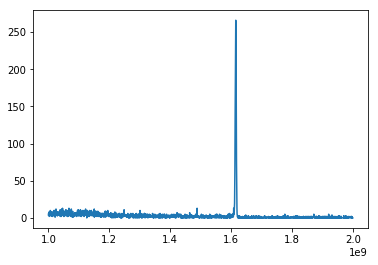

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 2048
    # variables        = 3
    chi-square         = 23337.760
    reduced chi-square = 11.412
    Akaike info crit   = 4989.212
    Bayesian info crit = 5006.086
[[Variables]]
    sigma:       1.7112e+06 +/- 1.30e+04 (0.76%) (init= 1708984)
    center:      1.6153e+09 +/- 1.30e+04 (0.00%) (init= 1.615234e+09)
    amplitude:   1.0805e+09 +/- 7.12e+06 (0.66%) (init= 1.36377e+09)
    fwhm:        4.0296e+06 +/- 3.07e+04 (0.76%)  == '2.3548200*sigma'
    height:      251.901280 +/- 1.660072 (0.66%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



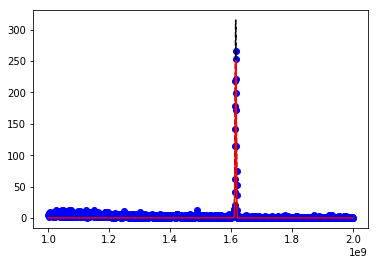

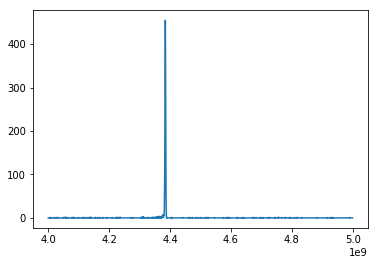

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 2048
    # variables        = 3
    chi-square         = 1492.749
    reduced chi-square = 0.730
    Akaike info crit   = -641.669
    Bayesian info crit = -624.795
[[Variables]]
    sigma:       1.1366e+06 +/- 1.49e+03 (0.13%) (init= 976562.5)
    center:      4.3845e+09 +/- 1.49e+03 (0.00%) (init= 4.384521e+09)
    amplitude:   1.2940e+09 +/- 1.47e+06 (0.11%) (init= 1.333008e+09)
    fwhm:        2.6764e+06 +/- 3.50e+03 (0.13%)  == '2.3548200*sigma'
    height:      454.195577 +/- 0.515105 (0.11%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



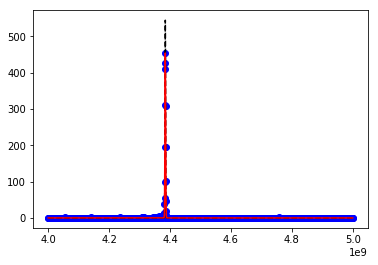

In [252]:
cs_662_fwhm, cs_pulser_fwhm = get_fwhm_cs(cs_raw_data, k, m, M)
cs_energy = [661.7]

In [253]:
print(cs_662_fwhm)

0.0024946


In [234]:
%run lab1_analysis_functions.py

In [230]:
print(cs_662_fwhm)

0.0007758


In [ ]:
cs_fwhm = get_fwhm(cs_raw_data, k, m, M)
cs_energy = [661.7]

In [ ]:
# END HERE STOP 

In [ ]:
start = time.time()
sampling_time = 10.0
number_of_events = len(raw_data)
n_data = 4096
x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[0:number_of_events,0:799],1).reshape((number_of_events,1))
signals = raw_data[:number_of_events,] - baseline

end1 = time.time()
print(end1 - start)

start = time.time()
M = find_M_value(signals[0:10])
print('M : ', M)
end1 = time.time()
print(end1 - start)

start = time.time()
signal = signals[0,:]
plt.plot(signal)
plt.show()
end1 = time.time()
print('plot')
print(end1 - start)

start = time.time()

peaking_time = 100 
gap = 100 
#M = 4400
filtered_signal = fast_trapezoidal_filter(signal, gap, peaking_time, M)

end1 = time.time()
print('trap')
print(end1 - start)
start = time.time()

plt.figure(41)
plt.cla()
plt.clf()
plt.plot(x_values, filtered_signal)
plt.show()
energy = get_energy_value(filtered_signal)
print(energy)

In [ ]:

if __name__ == "__main__":

    filename = './DATA_co60_2.h5'
    hf = tables.open_file(filename, "r")

    event_data = hf.root.EventData.read()
    raw_data = hf.root.RawData.read()
    hf.close()

    sampling_time = 10.0
    n_data = 4096
    x_values = np.linspace(0, n_data, n_data)
    print("XVAL" , len(x_values))

    k = 100 # peaking
    m = 100 # gap
    raw_signal = raw_data[2,:]
    print("RAW ", len(raw_signal))
    plt.plot(x_values, raw_signal)
    signal = baseline_correction(raw_signal)
    signal = trapezoidal_filter_2(signal, m, k)

    plt.figure(41)
    plt.cla()
    plt.clf()
    plt.plot(x_values, signal)
    plt.title('sample sig')
    plt.show()

    energy = get_energy_value(signal)
    print(energy)

    nrgs_2 = []
    number_of_events = len(raw_data)
    number_of_events = 1
    assert number_of_events < len(raw_data)
    k = 100 # peaking time
    l = 100 # gap

    for i in range(0, number_of_events, 1):
        gap = 100
        peak = 100
        signal = raw_data[i,:]
        signal = baseline_correction(signal)
        maxval = max(signal)
        signal = signal / maxval
        signal = trapezoidal_filter_2(signal, gap, peak)
        signal = signal / 424829.69
        print('gain = ', max(signal))
        nrg = get_energy_value(signal)
        #nrg = filter_and_get_energy(raw_data[i,:], gap, peak)
        nrgs_2.append(round(nrg, 7))



    plt.hist(nrgs_2, 500, log=True)
    plt.show()

In [ ]:
# filename = 'data/co60.h5'
start = time.time()
filename = 'data/DATA_co60_2.h5'
raw_data = import_data(filename)

end1 = time.time()
print('import')
print(end1 - start)

start = time.time()
sampling_time = 10.0
n_data = 4096
x_values = np.linspace(0, n_data, n_data)
#M = find_M_value(raw_data, 10)
M = 4400

end1 = time.time()
print('M')
print(end1 - start)

start = time.time()
print(M)
#M = 4400
raw_signal = raw_data[2,:]
signal = baseline_correction(raw_signal)

end1 = time.time()
print('baseline')
print(end1 - start)
start = time.time()

plt.plot(signal)
plt.show()

end1 = time.time()
print('plot')
print(end1 - start)
start = time.time()

peaking_time = 100 
gap = 100 
#M = 4400
filtered_signal = fast_trapezoidal_filter(signal, gap, peaking_time, M)

end1 = time.time()
print('trap')
print(end1 - start)
start = time.time()

plt.figure(41)
plt.cla()
plt.clf()
plt.plot(x_values, filtered_signal)
plt.show()
energy = get_energy_value(filtered_signal)
print(energy)

In [ ]:
nrgs = []
number_of_events = len(raw_data)
assert number_of_events <= len(raw_data)

#M = find_M_value(raw_data, 10)
M = 4400
k = 100 # peaking time
l = 100 # gap

for i in range(0, number_of_events, 1):
    signal = raw_data[i,:]
    nrg = fast_trapezoidal_filter_energy(signal, l, k, M)
    nrgs.append(round(nrg, 7))

In [ ]:
nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[1.75e8, 2.9e8]) #range=[2.3e8, 2.9e8] WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.figure()
plt.plot(bins, counts)
plt.title('Co-60 Spectrum')
plt.ylabel('counts')
plt.xlabel('channel')
plt.savefig('./co60.pdf')
plt.show()

nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8]) # WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.figure()
plt.plot(bins, counts)
plt.title('Co-60 Spectrum')
plt.ylabel('counts')
plt.xlabel('channel')
plt.savefig('./co60.pdf')
plt.show()


In [ ]:
co_energies = calibrate_co_spectrum(nrgs)


In [ ]:
plt.plot(co_energies, counts)
plt.show()

In [ ]:
energy_values = []
fwhm_values = []

fwhm, center = get_energy_resolution_co_1332(co_energies, counts)
fwhm_values.append(fwhm)
energy_values.append(center)

plt.plot(energy_values, fwhm_values, 'o')
plt.show()